In [59]:
import pandas as pd
import urllib.parse
import numpy as np
import matplotlib.pyplot as plt

# Закодувати URL за допомогою UTF-8
url = "https://uk.wikipedia.org/wiki/Населення_України#Народжуваність"
encoded_url = urllib.parse.quote(url, safe=':/')

# Прочитати таблиці з URL
tables = pd.read_html(encoded_url)
birth_rate_table = tables[12]
# Вивести перші рядки таблиці
birth_rate_table.head()




,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


In [60]:
# Визначити кількість рядків та стовпців у DataFrame
birth_rate_table.shape


(28, 9)

In [61]:
# Замінити "—" на NaN
birth_rate_table.replace("—", np.nan, inplace=True)

# Визначити типи всіх стовпців
birth_rate_table.dtypes


Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

In [62]:
# Замінити типи нечислових колонок на числові, крім стовпця з регіонами
for column in birth_rate_table.columns:
    if column != 'Регіон':
        birth_rate_table[column] = pd.to_numeric(birth_rate_table[column], errors='coerce')

# Перевірити типи даних після конвертації
birth_rate_table.dtypes


Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object

In [63]:
# Порахувати частку пропусків у кожній колонці
missing_data_percentage = birth_rate_table.isnull().sum() / len(birth_rate_table) * 100
missing_data_percentage

Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64

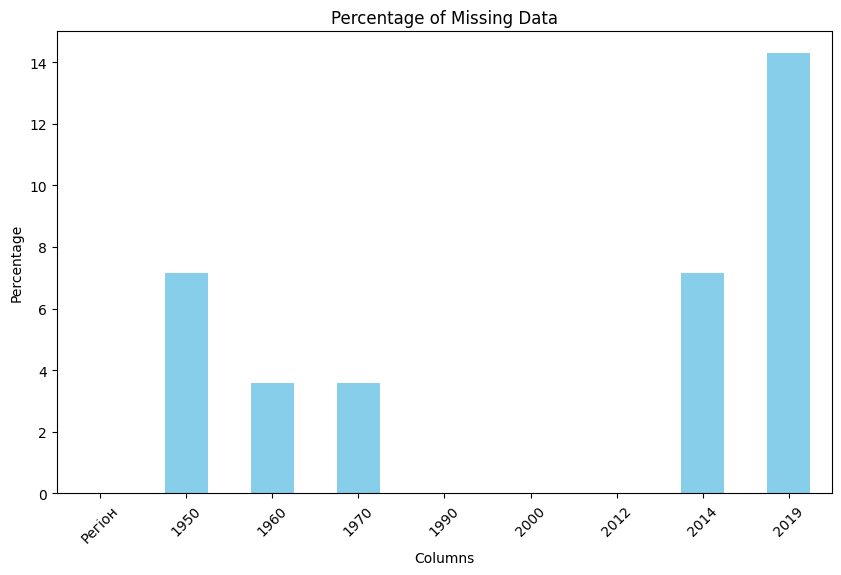

In [64]:
plt.figure(figsize=(10, 6))
missing_data_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Data')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

In [65]:
# Видалити останній рядок, що містить дані по всій країні
birth_rate_table.drop(birth_rate_table.tail(1).index, inplace=True)

# Замінити відсутні дані в стовпцях років середніми значеннями цих стовпців
birth_rate_table.iloc[:, 1:] = birth_rate_table.iloc[:, 1:].fillna(birth_rate_table.iloc[:, 1:].mean())



In [66]:
# Отримати список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
average_birth_rate_2019 = birth_rate_table['2019'].mean()
regions_above_average_2019 = birth_rate_table[birth_rate_table['2019'] > average_birth_rate_2019]['Регіон']
regions_above_average_2019



2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object

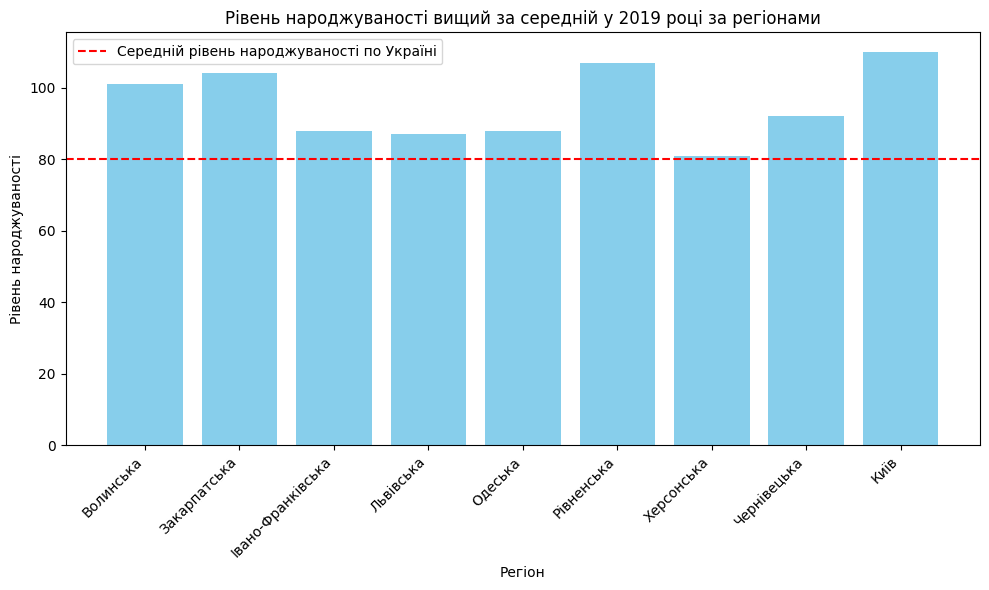

In [68]:
birth_rate_table_filtered = birth_rate_table[birth_rate_table['2019'] > average_birth_rate_2019]
regions = birth_rate_table_filtered['Регіон']
birth_rates = birth_rate_table_filtered['2019']

plt.figure(figsize=(10, 6))
plt.bar(regions, birth_rates, color='skyblue')
plt.axhline(y=average_birth_rate_2019, color='r', linestyle='--', label='Середній рівень народжуваності по Україні')
plt.title('Рівень народжуваності вищий за середній у 2019 році за регіонами')
plt.xlabel('Регіон')
plt.ylabel('Рівень народжуваності')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Знайти регіон з найвищою народжуваністю у 2014 році
highest_birth_rate_2014_region = birth_rate_table.loc[birth_rate_table['2014'].idxmax()]['Регіон']
highest_birth_rate_2014_region


In [ ]:
# Порахувати частку пропусків у кожній колонці
missing_data_percentage = birth_rate_table.isnull().sum() / len(birth_rate_table) * 100
missing_data_percentage


In [ ]:
# Видалити останній рядок, що містить дані по всій країні
birth_rate_table = birth_rate_table.drop(birth_rate_table.tail(1).index)


In [ ]:
# Замінити відсутні дані в стовпцях років середніми значеннями цих стовпців
years_mean = birth_rate_table.iloc[:, 1:].mean()
birth_rate_table.iloc[:, 1:].fillna(years_mean, inplace=True)



In [ ]:
# Отримати список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
average_birth_rate_2019 = birth_rate_table['2019'].mean()
regions_above_average_2019 = birth_rate_table[birth_rate_table['2019'] > average_birth_rate_2019]['Регіон']
regions_above_average_2019


In [ ]:
# Побудувати стовпчикову діаграму народжуваності по регіонах у 2019 році
birth_rate_table.plot(kind='bar', x='Регіон', y='2019', figsize=(10, 6))
plt.title('Народжуваність по регіонах в 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Народжуваність')
plt.xticks(rotation=90)
plt.show()

